<a href="https://colab.research.google.com/github/kiranbapatla/Time-Series-Brown-Plant-Hoppper-Prediction-Weather-Parameters/blob/main/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima # install arima package

In [ ]:
#importimg the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error # metrices
from sklearn.metrics import r2_score # r2 value
from sklearn.metrics import mean_absolute_error as mae # MAE value
from statsmodels.tsa.stattools import adfuller #ADF test
from statsmodels.tsa.arima.model import ARIMA # ARIMA
from pmdarima import auto_arima
from keras.preprocessing.sequence import TimeseriesGenerator
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [ ]:
#importing the data file in csv format from google drive files
df = pd.read_csv('/content/drive/MyDrive/BPH_SARIMAX/CH.csv')

In [ ]:
#information about columns in the data file like data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    102 non-null    object 
 1   SMW     102 non-null    int64  
 2   Temp    102 non-null    float64
 3   RH      102 non-null    float64
 4   RF      102 non-null    float64
 5   BPH     102 non-null    float64
 6   BPH+1   102 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.7+ KB


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>], dtype=object)

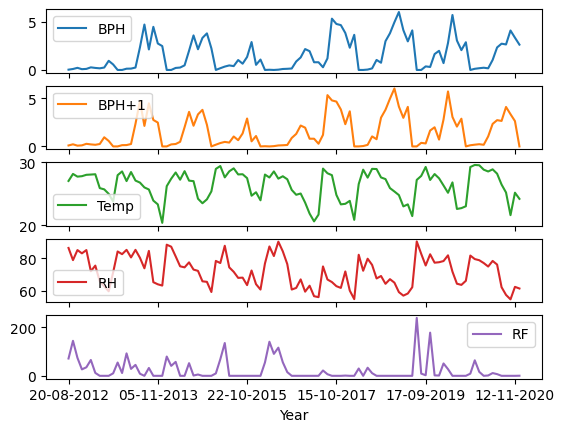

In [ ]:
#Indexing the Date column for plotting
df.set_index('Year')[['BPH','BPH+1','Temp','RH','RF']].plot(subplots=True)

In [ ]:
#information of data frame
df

,Year,SMW,Temp,RH,RF,BPH,BPH+1
0,20-08-2012,34,27.04,86.29,71.4,0.03,0.10
1,27-08-2012,35,28.16,78.86,144.4,0.10,0.22
2,03-09-2012,36,27.73,85.00,74.2,0.22,0.08
3,10-09-2012,37,27.80,83.00,26.6,0.08,0.11
4,17-09-2012,38,28.02,85.00,35.2,0.11,0.27
...,...,...,...,...,...,...,...
97,22-10-2020,43,26.47,62.29,0.0,2.73,2.65
98,29-10-2020,44,25.20,57.57,0.0,2.65,4.10
99,05-11-2020,45,21.59,54.86,0.0,4.10,3.35
100,12-11-2020,46,25.17,62.50,0.0,3.35,2.63


In [ ]:
#Checking stationality of the data using ADF test

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",  dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
adf_test(df['BPH+1']) # p<0.05 data is stationary and p>0.05 data is not stationary

1. ADF :  -5.6641806733082225
2. P-Value :  9.232580609860658e-07
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 97
5. Critical Values :
	 1% :  -3.4996365338407074
	 5% :  -2.8918307730370025
	 10% :  -2.5829283377617176


In [ ]:
# Indexing the date column
df.set_index('Year', inplace = True)

In [ ]:
# Information of data frame
df

,SMW,Temp,RH,RF,BPH,BPH+1
Year,,,,,,
20-08-2012,34,27.04,86.29,71.4,0.03,0.10
27-08-2012,35,28.16,78.86,144.4,0.10,0.22
03-09-2012,36,27.73,85.00,74.2,0.22,0.08
10-09-2012,37,27.80,83.00,26.6,0.08,0.11
17-09-2012,38,28.02,85.00,35.2,0.11,0.27
...,...,...,...,...,...,...
22-10-2020,43,26.47,62.29,0.0,2.73,2.65
29-10-2020,44,25.20,57.57,0.0,2.65,4.10
05-11-2020,45,21.59,54.86,0.0,4.10,3.35


In [ ]:
#To identify best p,d,q values
#p = AR (how many past days required for prediction)
#d = I (integrating the AR and MR for differencing if data has seasonality)
#q = MR (using past error for prediction)
stepwise_fit = auto_arima(df['BPH+1'], X=df[['BPH','Temp','RH','RF']],  trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=338.977, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=332.620, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=332.836, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=336.122, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=334.842, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=334.714, Time=0.51 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 4.980 seconds


In [ ]:
#Define input
input = df[['BPH','Temp','RH','RF']]

In [ ]:
#Define output
output = df[['BPH+1']]

In [ ]:
# Splitting the input and output data
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size = 0.30, random_state=555, shuffle = False)

In [ ]:
x_train

,BPH,Temp,RH,RF
Year,,,,
20-08-2012,0.03,27.04,86.29,71.4
27-08-2012,0.10,28.16,78.86,144.4
03-09-2012,0.22,27.73,85.00,74.2
10-09-2012,0.08,27.80,83.00,26.6
17-09-2012,0.11,28.02,85.00,35.2
...,...,...,...,...
10-09-2018,0.00,28.84,72.36,0.0
17-09-2018,0.04,27.57,79.71,33.4
24-09-2018,0.16,28.97,75.93,11.0


In [ ]:
#shape of training and test data after splitting
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("x_test : ", y_test.shape)

x_train :  (71, 4)
y_train :  (71, 1)
x_test :  (31, 4)
x_test :  (31, 1)


In [ ]:
#ARIMA model fitting
model=ARIMA(y_train, exog = x_train, order = (0,0,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  BPH+1   No. Observations:                   71
Model:                          ARIMA   Log Likelihood                -104.108
Date:                Thu, 23 May 2024   AIC                            220.217
Time:                        05:43:05   BIC                            233.793
Sample:                             0   HQIC                           225.615
                                 - 71                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3606      2.130     -2.047      0.041      -8.536      -0.186
BPH            0.7564      0.140      5.415      0.000       0.483       1.030
Temp           0.1833      0.082      2.236      0.025       0.023       0.344
RH            -0.0001      0.022     -0.005      0.996      -0.042       0.042
RF            -0.0051      0.011     -0.479      0.632      -0.026       0.016
sigma2         1.0994      0.202      5.444      0.000       0.704       1.495
===================================================================================
Ljung-Box (L1) (Q):                   1.84   Jarque-Bera (JB):                17.67
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.93
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#calculating feature importance in prediction model
# Get the coefficients (feature importance) from the ARIMA model
feature_importance = model.params.drop('const')*100  # Drop intercept term
feature_names = ['BPH (t-1)', 'Temperature', 'Relative Humidity', 'Rainfall']
for name, importance in zip(feature_names, feature_importance):
    print(f'{name}: {importance:.4f}')


BPH (t-1): 75.6409
Temperature: 18.3266
Relative Humidity: -0.0109
Rainfall: -0.5069


In [ ]:
print("Length of feature_names:", len(feature_names))
print("Length of feature_importance:", len(feature_importance))

Length of feature_names: 4
Length of feature_importance: 5


In [ ]:
#remove extra feature importance value
feature_importance = feature_importance[:-1]

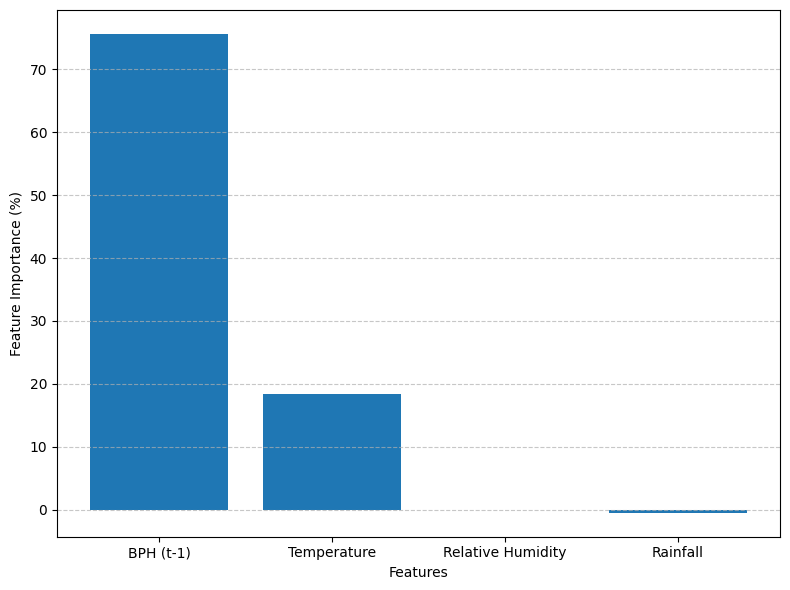

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance)
#plt.title('Feature Importance from MLP Model Weights')
plt.xlabel('Features')
plt.ylabel('Feature Importance (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('SARIMAX_feature_importance.pdf', dpi=300)
plt.show()

In [ ]:
#make a prediction on test data set
start = len(x_train['BPH'])-len(x_train['BPH'])
end=len(x_train['BPH'])-1
y_train_pred=model.predict(start=start,end=end,typ='levels',exog=x_train)
y_train_pred.index=df.index[start:end+1]
print(y_train_pred)

Year
20-08-2012    0.246205
27-08-2012    0.135177
03-09-2012    0.502324
10-09-2012    0.650766
17-09-2012    0.669963
                ...   
10-09-2018    0.916853
17-09-2018    0.544248
24-09-2018    1.005552
01-10-2018    1.722362
08-10-2018    1.257263
Name: predicted_mean, Length: 71, dtype: float64


In [ ]:
#Changing train data predicted list to dataframe format
y_train_data = pd.DataFrame(y_train_pred)
y_train_data = y_train_data.reset_index()
y_train_data

,Year,predicted_mean
0,20-08-2012,0.246205
1,27-08-2012,0.135177
2,03-09-2012,0.502324
3,10-09-2012,0.650766
4,17-09-2012,0.669963
...,...,...
66,10-09-2018,0.916853
67,17-09-2018,0.544248
68,24-09-2018,1.005552
69,01-10-2018,1.722362


In [ ]:
#resetting the index to make a one data frame
x_train_indexed = x_train.reset_index()
x_train_indexed

,Year,BPH,Temp,RH,RF
0,20-08-2012,0.03,27.04,86.29,71.4
1,27-08-2012,0.10,28.16,78.86,144.4
2,03-09-2012,0.22,27.73,85.00,74.2
3,10-09-2012,0.08,27.80,83.00,26.6
4,17-09-2012,0.11,28.02,85.00,35.2
...,...,...,...,...,...
66,10-09-2018,0.00,28.84,72.36,0.0
67,17-09-2018,0.04,27.57,79.71,33.4
68,24-09-2018,0.16,28.97,75.93,11.0
69,01-10-2018,1.04,28.94,67.64,0.0


In [ ]:
# train_data_export
train_act_pred = pd.DataFrame(columns=['MSW', 'Actual', 'Predicted'])
#train_act_pred['MSW'] = n_df[0:70]['SMW'] # if dates are present in data
train_act_pred['MSW'] = range(1,71)
train_act_pred['Actual'] = x_train_indexed['BPH']
train_act_pred['Predicted'] = y_train_data['predicted_mean']
train_act_pred.to_csv('ARIMA_train_act_pred.csv')

In [ ]:
#make a prediction on test data set
start = len(x_train['BPH'])
end=len(x_train['BPH'])+len(x_test['BPH'])-1
y_test_pred=model.predict(start=start,end=end,typ='levels',exog=x_test)
y_test_pred.index=df.index[start:end+1]
print(y_test_pred)

Year
15-10-2018    2.904492
22-10-2018    3.260532
29-10-2018    4.031672
05-11-2018    4.729637
12-11-2018    2.977945
19-11-2018    2.151451
26-11-2018    2.670627
03-09-2019   -0.595359
10-09-2019    0.685819
17-09-2019    1.263012
24-09-2019   -0.053133
01-10-2019    2.026977
08-10-2019    2.162546
15-10-2019    0.732898
22-10-2019    2.219438
29-10-2019    4.863979
05-11-2019    2.085087
12-11-2019    1.352581
19-11-2019    2.027543
03-09-2020    0.947187
10-09-2020    0.819865
17-09-2020    1.097455
24-09-2020    1.090312
01-10-2020    0.984918
08-10-2020    1.654237
15-10-2020    2.533662
22-10-2020    2.548611
29-10-2020    2.255867
05-11-2020    2.691366
12-11-2020    2.779315
19-11-2020    2.053182
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
#Changing train data predicted list to dataframe format
y_test_data = pd.DataFrame(y_test_pred)
y_test_data = y_test_data.reset_index()
y_test_data

,Year,predicted_mean
0,15-10-2018,2.904492
1,22-10-2018,3.260532
2,29-10-2018,4.031672
3,05-11-2018,4.729637
4,12-11-2018,2.977945
5,19-11-2018,2.151451
6,26-11-2018,2.670627
7,03-09-2019,-0.595359
8,10-09-2019,0.685819
9,17-09-2019,1.263012


In [ ]:
#resetting the index to make a one data frame
x_test_indexed = x_test.reset_index()
x_test_indexed

,Year,BPH,Temp,RH,RF
0,15-10-2018,2.99,27.34,64.36,0.0
1,22-10-2018,3.81,25.90,67.21,0.0
2,29-10-2018,4.96,25.36,65.07,0.0
3,05-11-2018,6.02,24.79,59.29,0.0
4,12-11-2018,4.14,22.99,57.14,0.0
5,19-11-2018,2.97,23.31,58.43,0.0
6,26-11-2018,4.11,21.44,62.29,0.0
7,03-09-2019,0.00,27.21,90.29,239.0
8,10-09-2019,0.00,27.84,82.71,9.2
9,17-09-2019,0.37,29.27,75.57,2.4


In [ ]:
# test_data_export
test_act_pred = pd.DataFrame(columns=['MSW', 'Actual', 'Predicted'])
#train_act_pred['MSW'] = n_df[0:70]['SMW'] # if dates are present in data
test_act_pred['MSW'] = range(1,30)
test_act_pred['Actual'] = x_test_indexed['BPH']
test_act_pred['Predicted'] = y_test_data['predicted_mean']
test_act_pred.to_csv('ARIMA_test_act_pred.csv')

In [ ]:
# calculate root mean square error (RMSE)

trainScore = math.sqrt(mean_squared_error(train_act_pred['Actual'], train_act_pred['Predicted']))
print('Train Score: %2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(test_act_pred['Actual'], test_act_pred['Predicted']))
print('Test Score: %2f RMSE' %(testScore))

# calculate coefficient of determination (r2)

r2 = r2_score(train_act_pred['Actual'], train_act_pred['Predicted'])
print(('Train Score: %2f r2' %(r2)))

r2 = r2_score(test_act_pred['Actual'], test_act_pred['Predicted'])
print(('Test Score: %2f r2' %(r2)))

# calculate mean absolute error (MAE)

MAE = mae(train_act_pred['Actual'], train_act_pred['Predicted'])
print(('Train Score: %2f MAE' %(MAE)))

MAE = mae(test_act_pred['Actual'], test_act_pred['Predicted'])
print(('Test Score: %2f MAE' %(MAE)))

Train Score: 0.612807 RMSE
Test Score: 0.794494 RMSE
Train Score: 0.827018 r2
Test Score: 0.803599 r2
Train Score: 0.520786 MAE
Test Score: 0.702640 MAE


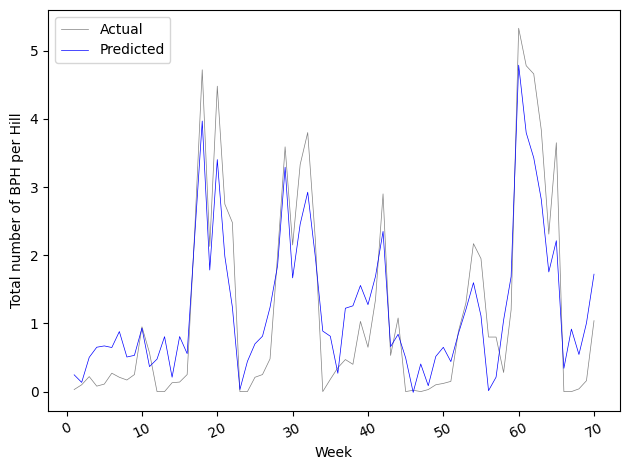

In [ ]:
# train plot
plt.plot(train_act_pred['MSW'], train_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(train_act_pred['MSW'], train_act_pred['Predicted'], color = 'blue', lw = 0.5)
plt.ylabel('Total number of BPH per Hill')
plt.xlabel('Week')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('ARIMA_train_actual_predicted.pdf', dpi=300)
plt.show()

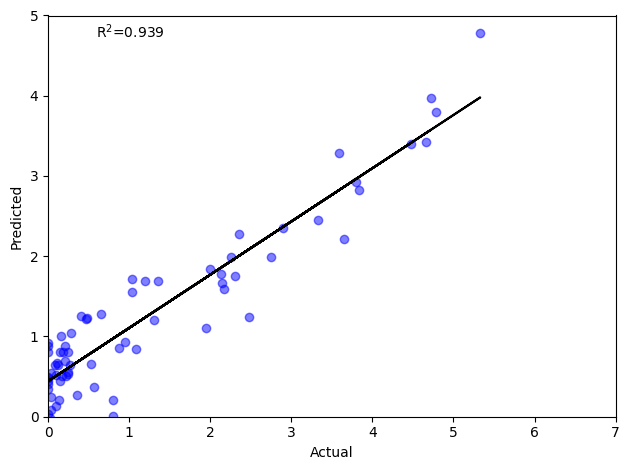

In [ ]:
# Scatter plot with regression line
plt.scatter(train_act_pred['Actual'],train_act_pred['Predicted'], color = 'blue', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(train_act_pred['Actual'], train_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(train_act_pred['Actual'], m*train_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(0,7)
plt.ylim(0,5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
#plt.legend('R2: ' + str(r2_score(train_act_pred['Actual'], train_act_pred['Predicted'])))
rvalue = stats.linregress(train_act_pred['Actual'],train_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('ARIMA_train_actual_scatter_plot.pdf', dpi=300)
plt.show()

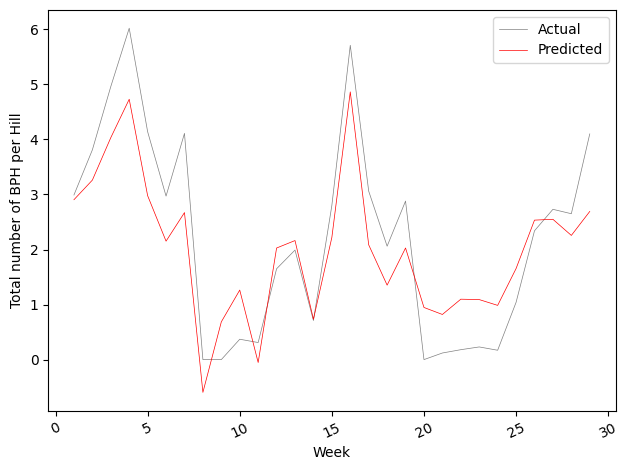

In [ ]:
# test plot
plt.plot(test_act_pred['MSW'], test_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(test_act_pred['MSW'], test_act_pred['Predicted'], color = 'red', lw = 0.5)
plt.ylabel('Total number of BPH per Hill')
plt.xlabel('Week')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('ARIMA_test_actual_predicted.pdf', dpi=300)
plt.show()

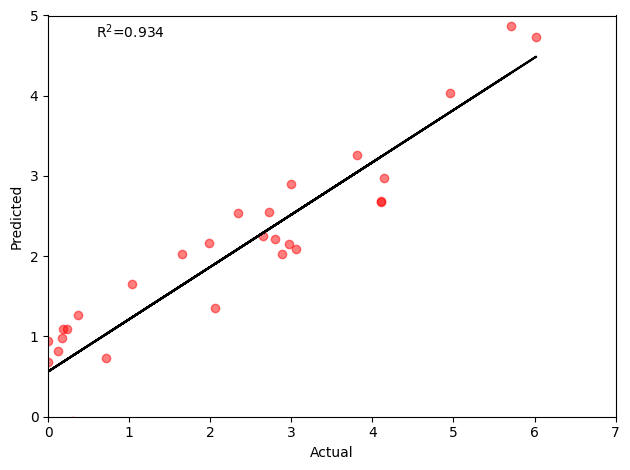

In [ ]:
# Scatter plot with regression line
plt.scatter(test_act_pred['Actual'],test_act_pred['Predicted'], color = 'red', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(test_act_pred['Actual'], test_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(test_act_pred['Actual'], m*test_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(0,7)
plt.ylim(0,5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
rvalue = stats.linregress(test_act_pred['Actual'],test_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('ARIMA_test_actual_scatter_plot.pdf', dpi=300)
plt.show()